## Method for building hidden layer

In [1]:
import tensorflow as tf


def add_layer(inputs, in_size, out_size, activation_function=None):
    """
    input: intput data
    in_size: number of input neurons
    out_size: number of output neurons
    """
    #initializer = tf.truncated_normal([in_size, out_size], stddev=0.5)
    initializer = tf.contrib.layers.xavier_initializer()
    #tf.keras.initializers.he_normal()
    #Weights = tf.Variable(initializer([in_size, out_size]))
    
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    bias = tf.Variable(initializer([1, out_size]))
    Wx_plus_b = tf.matmul(inputs, Weights) + bias
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [2]:
from numpy import genfromtxt
data = genfromtxt('data/body_data.csv', delimiter=';', skip_header=1)

height = data[:,[0]]
weight = data[:,[1]]
#print(weight)

## Build a simple neural network

### Normalization
a = your dataset

Normalization(a) = mean(a) / (max(a) - min(a))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[2.5086842]
[0.02277619]
[0.017481226]
[0.013628858]
[0.011379096]
[0.010414692]
[0.010094243]
[0.009967554]
[0.009866032]
[0.009756012]


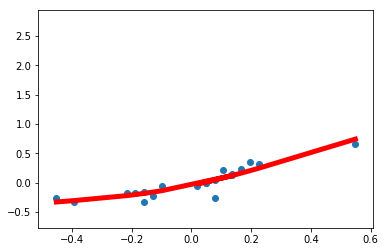

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib


#x_data = height
x_data = np.array([1.60, 1.62, 1.68, 1.69, 1.70, 1.70, 1.71, 1.72, 1.80, 1.76, 1.77, 1.78, 1.77, 1.78, 1.79, 1.80, 1.81, 1.82, 1.83, 1.94])
x_data = x_data[:, np.newaxis]
x_data = (x_data - np.mean(x_data)) / (np.amax(x_data) - np.amin(x_data))

#y_data = weight
y_data = np.array([60.5, 58.8, 62.7, 62.8, 63.1, 58.9, 61.5, 65.8, 70.0, 65.8, 66.8, 68.0, 66.7, 60.8, 72.4, 70.5, 72.8, 75.8, 74.6, 83.2])
y_data = y_data[:, np.newaxis]
y_data = (y_data - np.mean(y_data)) / (np.amax(y_data) - np.amin(y_data))

xs = tf.placeholder(tf.float32, [None,1])
ys = tf.placeholder(tf.float32, [None,1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.tanh)
prediction = add_layer(l1, 10, 1, activation_function=None)

#prediction = tf.nn.tanh(l2)
#prediction = tf.nn.relu(l2) # gradient decent only
#prediction = tf.nn.leaky_rtalu(l2)
#prediction = tf.nn.sigmoid(l2)

loss = tf.losses.mean_squared_error(labels=ys, predictions=prediction)

#train_step = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)

init = tf.global_variables_initializer()

# train a overfitting model
with tf.Session() as sess:
    sess.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data, y_data)
    plt.ion
    
    for i in range(5000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i%500 == 0:
            print(sess.run([loss], feed_dict={xs: x_data, ys: y_data}))
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            
            ######################## not working part ########################
            prediction_value = sess.run(prediction, feed_dict={xs:x_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            #plt.pause(0.1)
